# 变换三维对象


In [28]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from vectors import rotate2d, to_polar, to_cartesian
from common.vectors_draw import (
    draw2d, draw3d, Color, Vector2D, Vector3D,
    Points2D, Arrow2D,
    Points3D, Arrow3D, Polygon3D,
)
from math import pi


一般情况下, 变换即以一个向量为输入, 计算后的向量为输出, 类似如下代码

```python
def transform(v: Vector) -> Vector:
    x, y, z = v
    # 进行计算
    return (new_x, new_y, new_z)
```


## 1. 绘制变换后的对象


### 1.1. 绘制原始模型


**练习:** 绘制原始模型


In [29]:
!python draw_teapot.py


pygame 2.1.2 (SDL 2.0.16, Python 3.10.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 


### 1.2. 将原始模型放大 2 倍


**知识:** 通过 [`scale` 函数](./vectors.py), 通过放大向量长度, 进一步可以将向量组成的三角形放大

整个操作相当于将输入向量置于多个"处理器", 每个处理器的输出是下一个处理器的输入

![X](../assets/transform1.jpg)

将这些处理器连接起来后, 即可对输入向量进行各种处理

![X](../assets/transform2.jpg)


**练习:** 绘制放大 `2` 倍后的模型


In [30]:
!python scale_teapot.py


pygame 2.1.2 (SDL 2.0.16, Python 3.10.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 


### 1.3. 绕固定坐标轴旋转向量


**知识:** 旋转二维向量

对于二维向量, 改变其角度的方法为: 将笛卡儿坐标转换为极坐标, 按旋转系数增加或减少角度, 然后再转换回来


In [31]:
def rotate2d(angle: float, v: Vector2D) -> Vector2D:
    """
    将一个二维向量旋转指定弧度

    Args:
        angle (float): 要旋转的弧度
        v (Vector2D): 要旋转的向量

    Returns:
        Vector2D: 旋转角度后的新向量
    """
    # 将向量转为极坐标
    l, a = to_polar(v)
    # 将极坐标的角度分量增加指定弧度后转为笛卡尔坐标向量
    return to_cartesian((l, a + angle))


**练习:** 将二维向量 $(0, 1)$ 逆时针旋转 $90\degree$ 以及顺时针旋转 $45\degree$


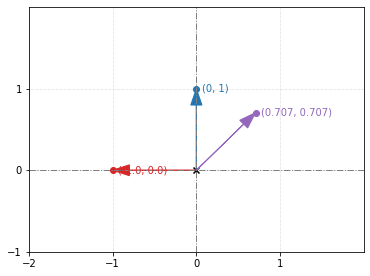

In [32]:
# 定义二维坐标
v = (0, 1)

# 向左旋转 90°
v_new1 = rotate2d(pi / 2, v)
# 向右旋转 45°
v_new2 = rotate2d(-(pi / 4), v)

# 绘制图形
draw2d(
    Points2D(v, color=Color.blue),
    Arrow2D(v, color=Color.blue),
    Points2D(v_new1, color=Color.red),
    Arrow2D(v_new1, color=Color.red),
    Points2D(v_new2, color=Color.purple),
    Arrow2D(v_new2, color=Color.purple),
    grid=(1, 1),
)


**知识:** 旋转三维向量

旋转二维向量的方法在三维空间也适用. 从某种意义上说, 所有的三维向量旋转在平面上都是孤立的. 例如, 试想三维点绕 $z$ 轴旋转, 其 $x$ 坐标和 $y$ 坐标会改变, 但 $z$ 坐标不变. 如果一个给定的点绕 $z$ 轴旋转, 无论旋转角度如何, 其 $z$ 坐标都不会改变, 该点保持在一个圆内

![X](../assets/rotate_by.jpg)


In [33]:
def rotate_z(angle: float, vector: Vector3D) -> Vector3D:
    """
    将三维向量围绕 `z` 轴进行旋转

    Args:
        angle (float): 旋转角度
        vector (Vector3D): 要选择的三维向量

    Returns:
        Vector3D: 旋转角度后的三维向量
    """
    # 获取三维分量
    x, y, z = vector
    # z 轴不变, 旋转 x, y 坐标
    new_x, new_y = rotate2d(angle, (x, y))
    # 返回旋转后的坐标
    return new_x, new_y, z


**练习:** 将三维向量 $(1, 0, 0)$ 围绕 $z$ 坐标轴旋转 $90\degree$ 以及 $-45\degree$


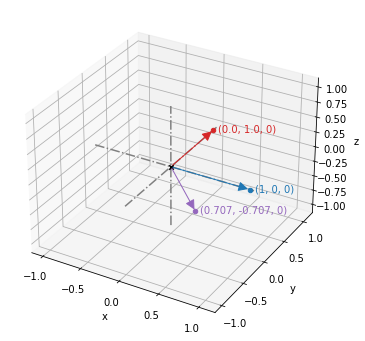

In [34]:
# 定义三维变量
v = (1, 0, 0)

# 围绕 y 轴旋转向量
# 旋转 90°
v_new1 = rotate_z(pi / 2, v)
# 旋转 45°
v_new2 = rotate_z(-(pi / 4), v)

# 绘制图形
draw3d(
    Points3D(v, color=Color.blue),
    Arrow3D(v, color=Color.blue),
    Points3D(v_new1, color=Color.red),
    Arrow3D(v_new1, color=Color.red),
    Points3D(v_new2, color=Color.purple),
    Arrow3D(v_new2, color=Color.purple),
)


**练习:** 绘制旋转 $45\degree$ 后的模型


In [35]:
!python rotate_teapot_z.py


pygame 2.1.2 (SDL 2.0.16, Python 3.10.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 


In [36]:
!python rotate_teapot_x.py


pygame 2.1.2 (SDL 2.0.16, Python 3.10.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 


### 1.4. 自定义几何变换

**知识:** 可以针对向量的某个轴的分量进行拉伸

In [37]:
def stretch(v: Vector3D, sx: float = 1.0, sy: float = 1.0, sz: float = 1.0) -> Vector3D:
    """
    拉伸一个向量

    Args:
        v (Vector3D): 要拉伸的三维向量
        sx (float, optional): `x` 轴拉伸倍数. Defaults to `1.0`.
        sy (float, optional): `y` 轴拉伸倍数. Defaults to `1.0`.
        sz (float, optional): `z` 轴拉伸倍数. Defaults to `1.0`.

    Returns:
        Vector3D: 拉伸后的向量
    """
    x, y, z = v
    return (x * sx, y * sy, z * sz)


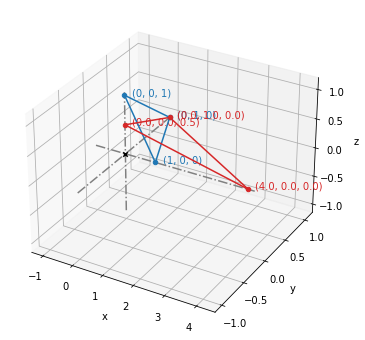

In [42]:
face = (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1)
)

new_face = [stretch(v, sx=4.0, sz=0.5) for v in face]

draw3d(
    Points3D(*face, color=Color.blue),
    Polygon3D(*face, color=Color.blue),
    Points3D(*new_face, color=Color.red),
    Polygon3D(*new_face, color=Color.red),
)


**练习:** 将模型 x 轴方向拉伸 4 倍

In [43]:
!python stretch_teapot_x.py


pygame 2.1.2 (SDL 2.0.16, Python 3.10.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 


**练习:** 将模型 y 轴方向拉伸 4 倍

In [44]:
!python stretch_teapot_y.py


pygame 2.1.2 (SDL 2.0.16, Python 3.10.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 
